In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("Sales.csv")
print(df)
df.tail()

         Date   Open   High    Low  Close   Volume  Stock Trading
0  2017-01-13  38900  39380  38240  38430  1321200    51197289000
1  2017-01-12  38300  38450  37930  38010   800900    30540359000
2  2017-01-11  38710  38880  38480  38560   545900    21089798000
3  2017-01-10  38620  38850  38150  38690  1196900    46107703000
4  2017-01-06  40500  41030  39720  39720  1435500    57708934000
5  2017-01-05  43250  43330  42470  42590   516800    22124250000
6  2017-01-04  42480  43330  42450  43290   648100    27916728000


,Date,Open,High,Low,Close,Volume,Stock Trading
2,2017-01-11,38710,38880,38480,38560,545900,21089798000
3,2017-01-10,38620,38850,38150,38690,1196900,46107703000
4,2017-01-06,40500,41030,39720,39720,1435500,57708934000
5,2017-01-05,43250,43330,42470,42590,516800,22124250000
6,2017-01-04,42480,43330,42450,43290,648100,27916728000


In [ ]:
x =df.iloc[:,[2,3]].values
y=df.iloc[:,5].values
print(x)

[[39380 38240]
 [38450 37930]
 [38880 38480]
 [38850 38150]
 [41030 39720]
 [43330 42470]
 [43330 42450]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=1)
print(x_test)
print(y_test)

[[43330 42450]
 [38880 38480]
 [38450 37930]
 [39380 38240]]
[ 648100  545900  800900 1321200]


In [ ]:
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)
print(x_train)

[[-0.02186783 -0.2203019 ]
 [-1.21366453 -1.09964255]
 [ 1.23553236  1.31994445]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred)
plt.show()

[ 516800 1196900 1196900 1196900]


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 5)
classifier.fit(x_train,y_train)


LogisticRegression(random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(x_train,y_train)


LogisticRegression(random_state=3)

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[ 516800 1196900 1196900 1196900]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]]


In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,y_pred))


Accuracy :  0.0


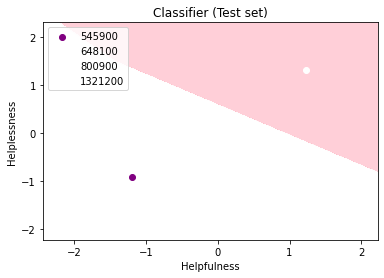

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('pink', 'white')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('purple', 'white'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Helpfulness')
plt.ylabel('Helplessness')
plt.legend()
plt.show()
